In [1]:
from MidiVideoifier import *
from re import findall,split
from collections import deque
import mido
import numpy as np
import moviepy.editor as me
from scipykit.mtp_initializer import *
plt.plot()
plt.ioff()
plt.close()

np.set_printoptions(threshold=10000,suppress=True)

%load_ext autoreload
%autoreload 1
%aimport MidiVideoifier

In [2]:
fp = 'test2.md'

In [3]:
script = Script(file_path=fp)
# midi_fp = script.session_data['midi_fp']
# audio_fp = script.session_data['audio_fp']
output_fp = script.session_data['output_fp']
mv = MidiVisualizer(**script.session_data)
mov = Movie(mv, **script.session_data)
print(mov.__dict__)
mov.arr_clip.clear()
mov.make_section_Background()
mov.make_section_Title()
mov.make_section_CountDown()
mov.make_section_Para(script.paragraphs)
mov.make_section_Midi(script.midi_patterns)
comp_vc = me.CompositeVideoClip(mov.arr_clip, size=(mov.w, mov.h))
if None is not script.session_data['subclip_tBar']:
    subclip_tBar = script.session_data['subclip_tBar']
    comp_vc = comp_vc.subclip(
        mv.timeBar2Mov(subclip_tBar[0]),
        mv.timeBar2Mov(subclip_tBar[1])
        )
elif None is not script.session_data['subclip_tMov']:
    subclip_tMov = script.session_data['subclip_tMov']
    comp_vc = comp_vc.subclip(
        subclip_tMov[0],
        subclip_tMov[1],
        )

{'MV': <MidiVideoifier.MidiVisualizer object at 0x000002045A72ACD0>, 'audio': <moviepy.audio.io.AudioFileClip.AudioFileClip object at 0x000002045A991190>, 'arr_clip': [], 'h': 1080, 'w': 2160, 'BeginTime': 1, 'CountDown': 4, 'InitBar': 1, 'bpB': 4, 'Title': '《弗拉门戈弦乐》', 'Saying': '赞同与喜欢是人类进步的阶梯', 'Name': '—— Gray Frezicical', 'FontPath': 'C:/Users/Gray/AppData/Local/Microsoft/Windows/Fonts/sarasa-mono-sc-regular.ttf', 'movie_length': 225.39}
processing Paragraph 
|== Paragraph ======================== [2.0, 6.0] ==|
嘿


|---------------------------------------------------|


processing Paragraph 
|== Paragraph ======================= [6.0, 11.0] ==|
这是你希望写出来的曲子吗？


|---------------------------------------------------|


processing Paragraph 
|== Paragraph ====================== [11.0, 12.0] ==|
这次来聊聊弗拉门戈


|---------------------------------------------------|


processing Paragraph 
|== Paragraph ====================== [12.0, 16.0] ==|
上次说到弗里吉亚调式，放在白键上就是：
3 4 5 6 7 1 2 3
iii - IV 带来一种阴森

{'Organ': 'Organ', 'Felt Pno': 'Felt Pno'}

[32.0, 40.0]

[32.0, 40.0]

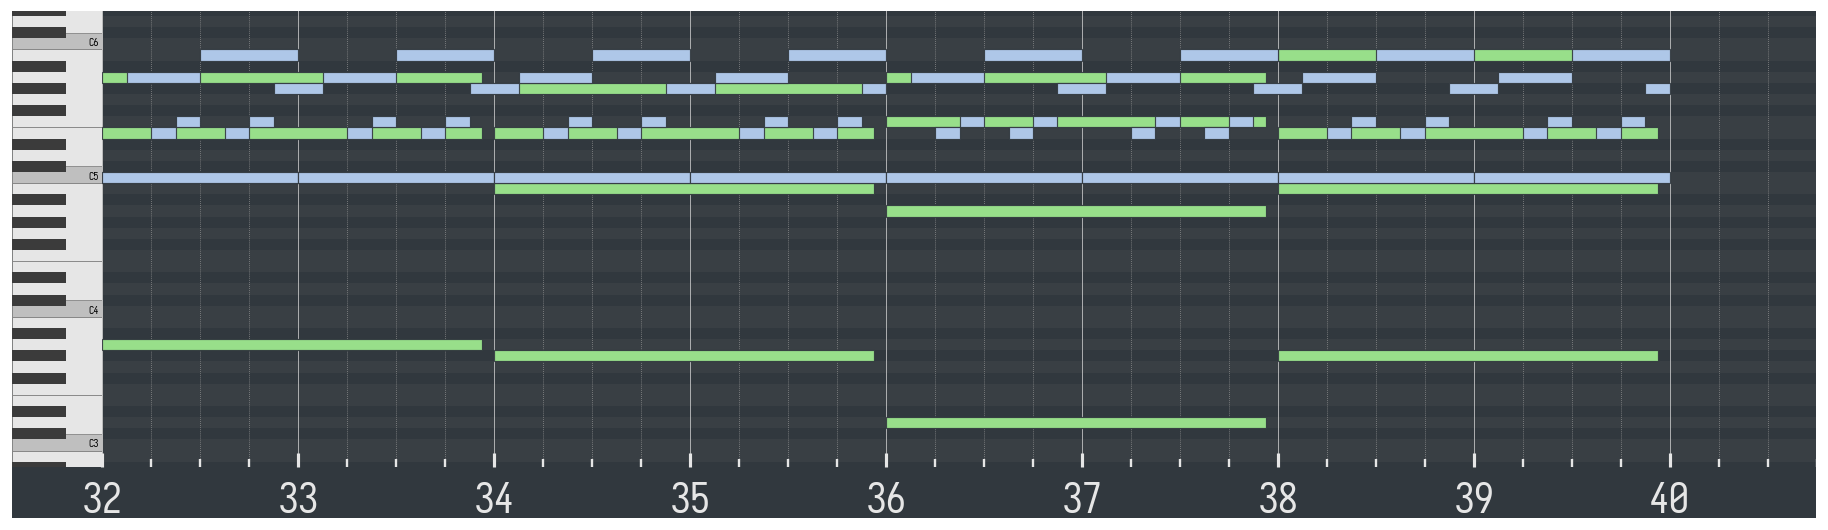

In [5]:
i = 4
# mv.put_midi_data(script.midi_patterns[i])
disp(script.midi_patterns[i].channels)
disp(script.midi_patterns[i].range)
disp(script.midi_patterns[i].disp_range)
# mv.ax_bg.clear()
# disp(mv.ax_fg.__dict__)
# disp(script.midi_patterns[i].mtracks)
frame = mv.get_fig_static(script.midi_patterns[i])
show_image(frame[...,:3])

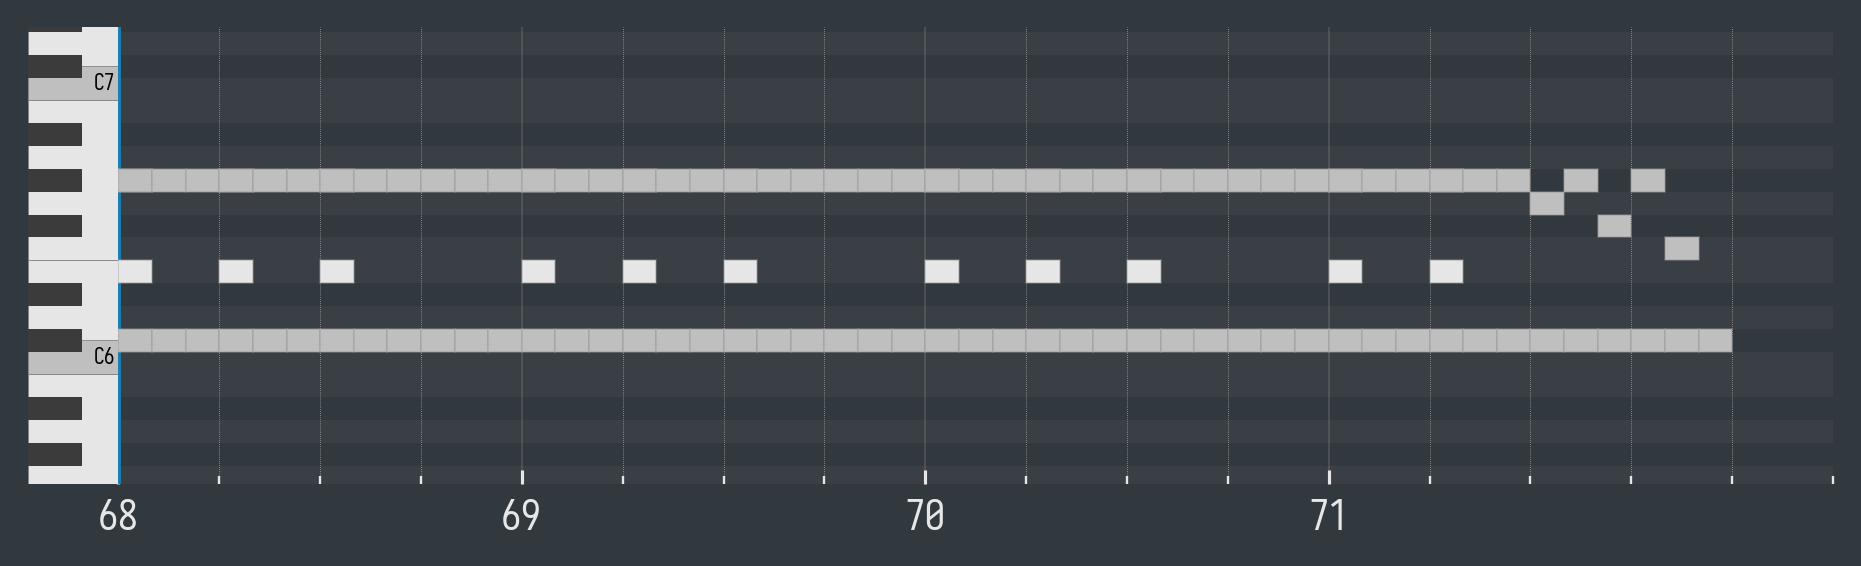

In [6]:
i = 1
# mv.put_midi_data(script.midi_patterns[i])
vclip = mv.get_video_clip_sytle_A(script.midi_patterns[i])
me.ipython_display(vclip,fps=4)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [7]:
# me.ipython_display(comp_vc.subclip(mov.movie_length-5,mov.movie_length-2),fps=10)
me.ipython_display(
    comp_vc.subclip(mv.timeBar2Mov(9), mv.timeBar2Mov(9)+12), fps=10
    )

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [33]:
comp_vc.subclip(0,mov.movie_length-2).write_videofile(
    'D:/Videos/视频工程/影视史诗_HoyoFair_教学2/电吉他与流行史诗.mp4',
    audio_bitrate='192k',
    fps=60,
    threads=12,
    codec='h264_nvenc',
    bitrate=f'{12000}k'
    )

Moviepy - Building video D:/Videos/视频工程/影视史诗_HoyoFair_教学2/电吉他与流行史诗.mp4.
MoviePy - Writing audio in 电吉他与流行史诗TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video D:/Videos/视频工程/影视史诗_HoyoFair_教学2/电吉他与流行史诗.mp4



Moviepy - Done !
Moviepy - video ready D:/Videos/视频工程/影视史诗_HoyoFair_教学2/电吉他与流行史诗.mp4


In [23]:
arr_vclip = [0,0]
mv.put_midi_data(script.midi_patterns[0])
mv.put_midi_data(script.midi_patterns[1])
arr_vclip[0] = mv.Test_get_video_clip_sytle_A(
    script.midi_patterns[0]
    ).set_duration(4).set_start(0)
arr_vclip[1] = mv.Test_get_video_clip_sytle_A(
    script.midi_patterns[1]
    ).set_duration(4).set_start(4)
me.ipython_display(me.CompositeVideoClip(arr_vclip), fps=4)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [7]:
me.ipython_display(arr_vclip[0],fps=10)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [464]:
it = comp_vc.iter_frames(1)

In [469]:
show_image(next(it))

StopIteration: 

In [422]:
me.ipython_display(mov.arr_clip[6].subclip(0,4),fps=4)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [312]:
VG = VideoGenerator()

In [313]:
mv.ax_fg.get_xlim()

(17.0, 25.75)

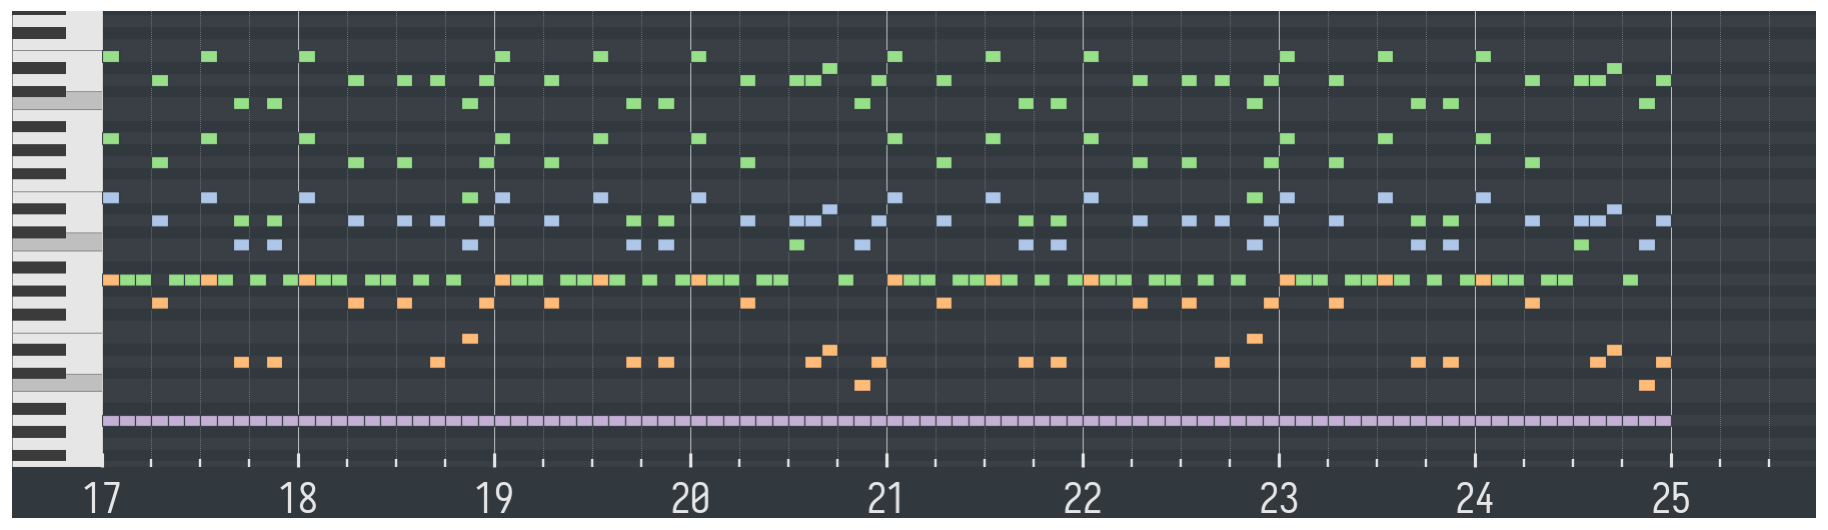

In [333]:
tmp = VG.generate_static(frame, (17.0, 25.75), 120)
show_image(tmp)

In [335]:
%%timeit -n 100 -r 1
VG.generate_static(frame, (17.0, 25.75), 120)

56.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)


In [4]:
me.ipython_display(mv.get_video_clip_sytle_S(script.midi_patterns[0]))

In [187]:
plt.close()

In [276]:
%%timeit -n 100 -r 1
mv.fig.canvas.draw()

46.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)


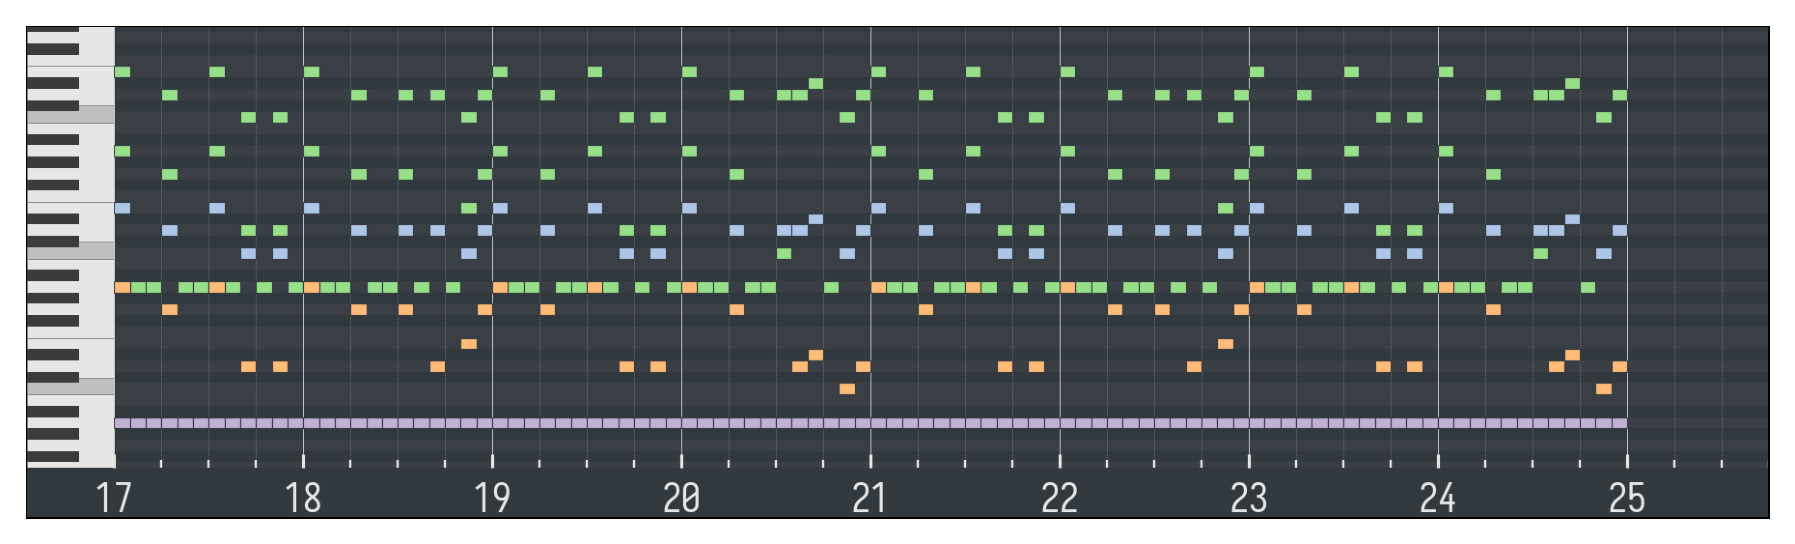

In [310]:
fig = mfigure(figsize=(6.4,1.8),dpi=272)
# ax = fig.add_subplot(1,1,1)
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(frame)
ax.axis('off')
# ax.imshow(frame)
disp(fig)

In [311]:
%%timeit -n 100 -r 1
fig.canvas.draw()

33.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)


In [192]:
ax.__dict__


{'_stale': True,
 'stale_callback': <function matplotlib.figure._stale_figure_callback(self, val)>,
 '_axes': <Axes: >,
 'figure': <Figure size 1998x900 with 2 Axes>,
 '_transform': None,
 '_transformSet': False,
 '_visible': True,
 '_animated': False,
 '_alpha': None,
 'clipbox': None,
 '_clippath': None,
 '_clipon': True,
 '_label': '',
 '_picker': None,
 '_rasterized': False,
 '_agg_filter': None,
 '_mouseover': False,
 '_callbacks': <matplotlib.cbook.CallbackRegistry at 0x1d43ad59ed0>,
 '_remove_method': <bound method FigureBase.delaxes of <Figure size 1998x900 with 2 Axes>>,
 '_url': None,
 '_gid': None,
 '_snap': None,
 '_sketch': None,
 '_path_effects': [],
 '_sticky_edges': _XYPair(x=[], y=[]),
 '_in_layout': True,
 '_position': Bbox([[0.11, 0.28667372505543237], [0.89, 0.7733262749445677]]),
 '_originalPosition': Bbox([[0.11, 0.15000000000000002], [0.89, 0.91]]),
 '_aspect': 1.0,
 '_adjustable': 'box',
 '_anchor': 'C',
 '_stale_viewlims': {'x': False, 'y': False},
 '_sharex': 

In [177]:
%%timeit -n 100 -r 1
fig.canvas.draw()

9.25 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)


In [142]:
%magic


IPython's 'magic' functions

The magic function system provides a series of functions which allow you to
control the behavior of IPython itself, plus a lot of system-type
features. There are two kinds of magics, line-oriented and cell-oriented.

Line magics are prefixed with the % character and work much like OS
command-line calls: they get as an argument the rest of the line, where
arguments are passed without parentheses or quotes.  For example, this will
time the given statement::

        %timeit range(1000)

Cell magics are prefixed with a double %%, and they are functions that get as
an argument not only the rest of the line, but also the lines below it in a
separate argument.  These magics are called with two arguments: the rest of the
call line and the body of the cell, consisting of the lines below the first.
For example::

        %%timeit x = numpy.random.randn((100, 100))
        numpy.linalg.svd(x)

will time the execution of the numpy svd routine, running the assignment 

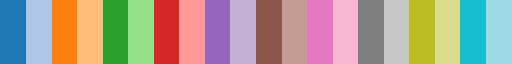

In [60]:
plt.get_cmap('tab20')

In [61]:
[plt.get_cmap('tab20')(x) for x in [5,1,3,9,17,15]]

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (1.0, 0.7333333333333333, 0.47058823529411764, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (1.0, 0.596078431372549, 0.5882352941176471, 1.0),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589, 1.0),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451, 1.0),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058, 1.0),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
 (0.7803921568627451

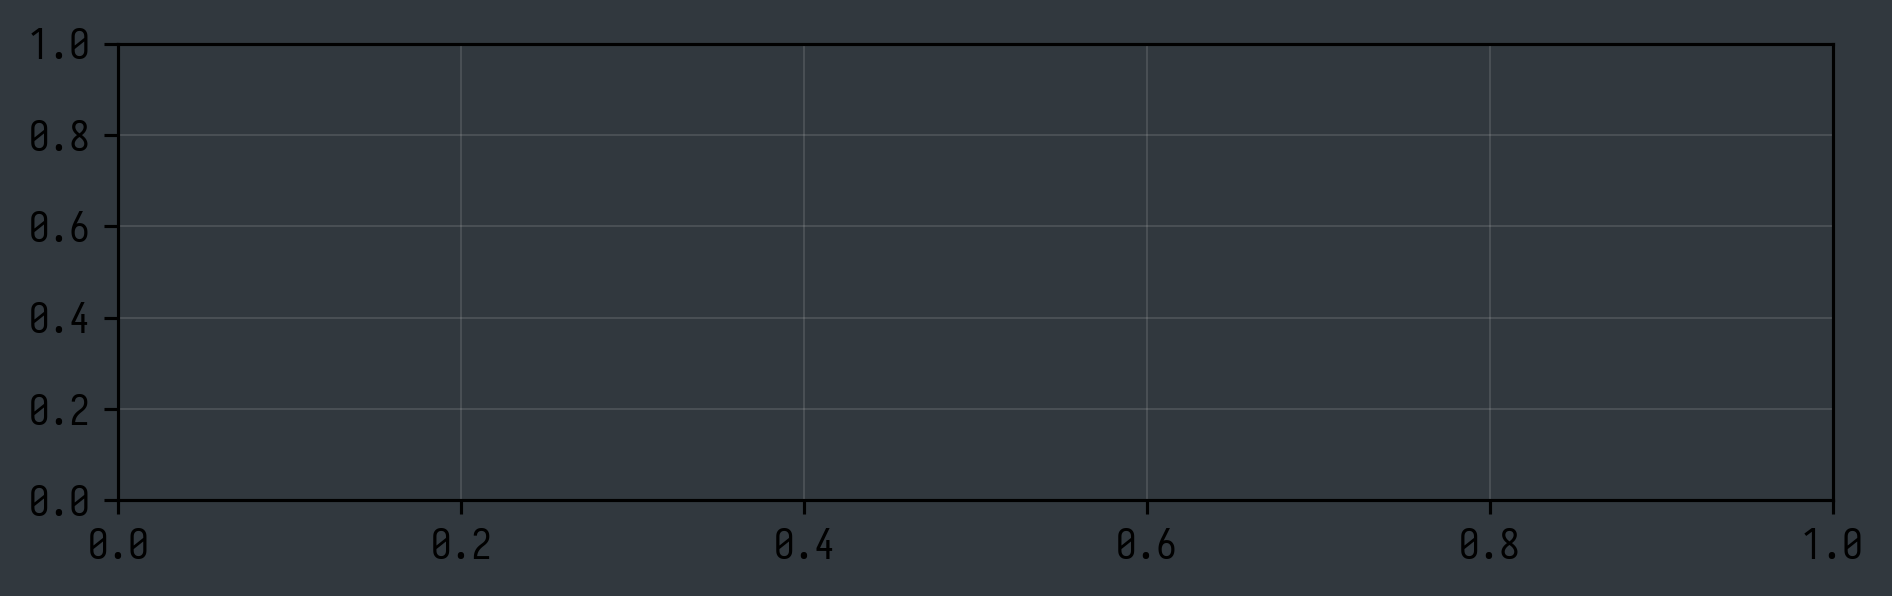

In [7]:
plt.close()
fig = plt.figure(
    figsize=(6.4, 1.8), dpi=282, facecolor=np.array([49, 56, 62])/255
    )
ax_bg = fig.add_axes([0,0.1,1,0.9])
ax_fg = fig.add_axes([0.05,0.1,0.95,0.9])

# ax_bg.barh(self.arr_keyboard_white,width=1,height=1,color=self.color_white_roll)
# ax_bg.barh(self.arr_keyboard_black,width=1,height=1,color=self.color_black_roll)
# ax_bg.barh(self.arr_keyboard_white_block_2,width=0.05,height=5,color=self.color_white_key,ec=self.color_edge,lw=0.2)
# ax_bg.barh(self.arr_keyboard_white_block_3,width=0.05,height=7,color=self.color_white_key,ec=self.color_edge,lw=0.2)
# ax_bg.barh(self.arr_keyboard_white_block_1,width=0.05,height=1.5,color=self.color_white_c,ec=self.color_edge,lw=0.2)
# ax_bg.barh(self.arr_keyboard_black,width=0.03,height=1,color=self.color_black_key)
# for c in self.arr_keyboard_white_block_1:
#     if ylim[0]<c<ylim[1]:
#         ax_bg.text(x=0.048,y=c,s=f'C{c//12:.0f}',fontsize=110/(ylim[1]-ylim[0]),va='center',ha='right')
ax_bg.set_xticks([])
ax_bg.set_yticks([])
ax_bg.set_xlim([0,1])
ax_bg.set_ylim([10,80])
# [x.set_visible(False) for x in ax_bg.spines.values()]
ax_bg.axis('off')

ax_fg.set_facecolor((0,0,0,0))
ax_fg.grid(which='minor',ls=':',lw=0.2)
ax_fg.grid(which='major',ls='-',lw=0.1)
disp(fig)

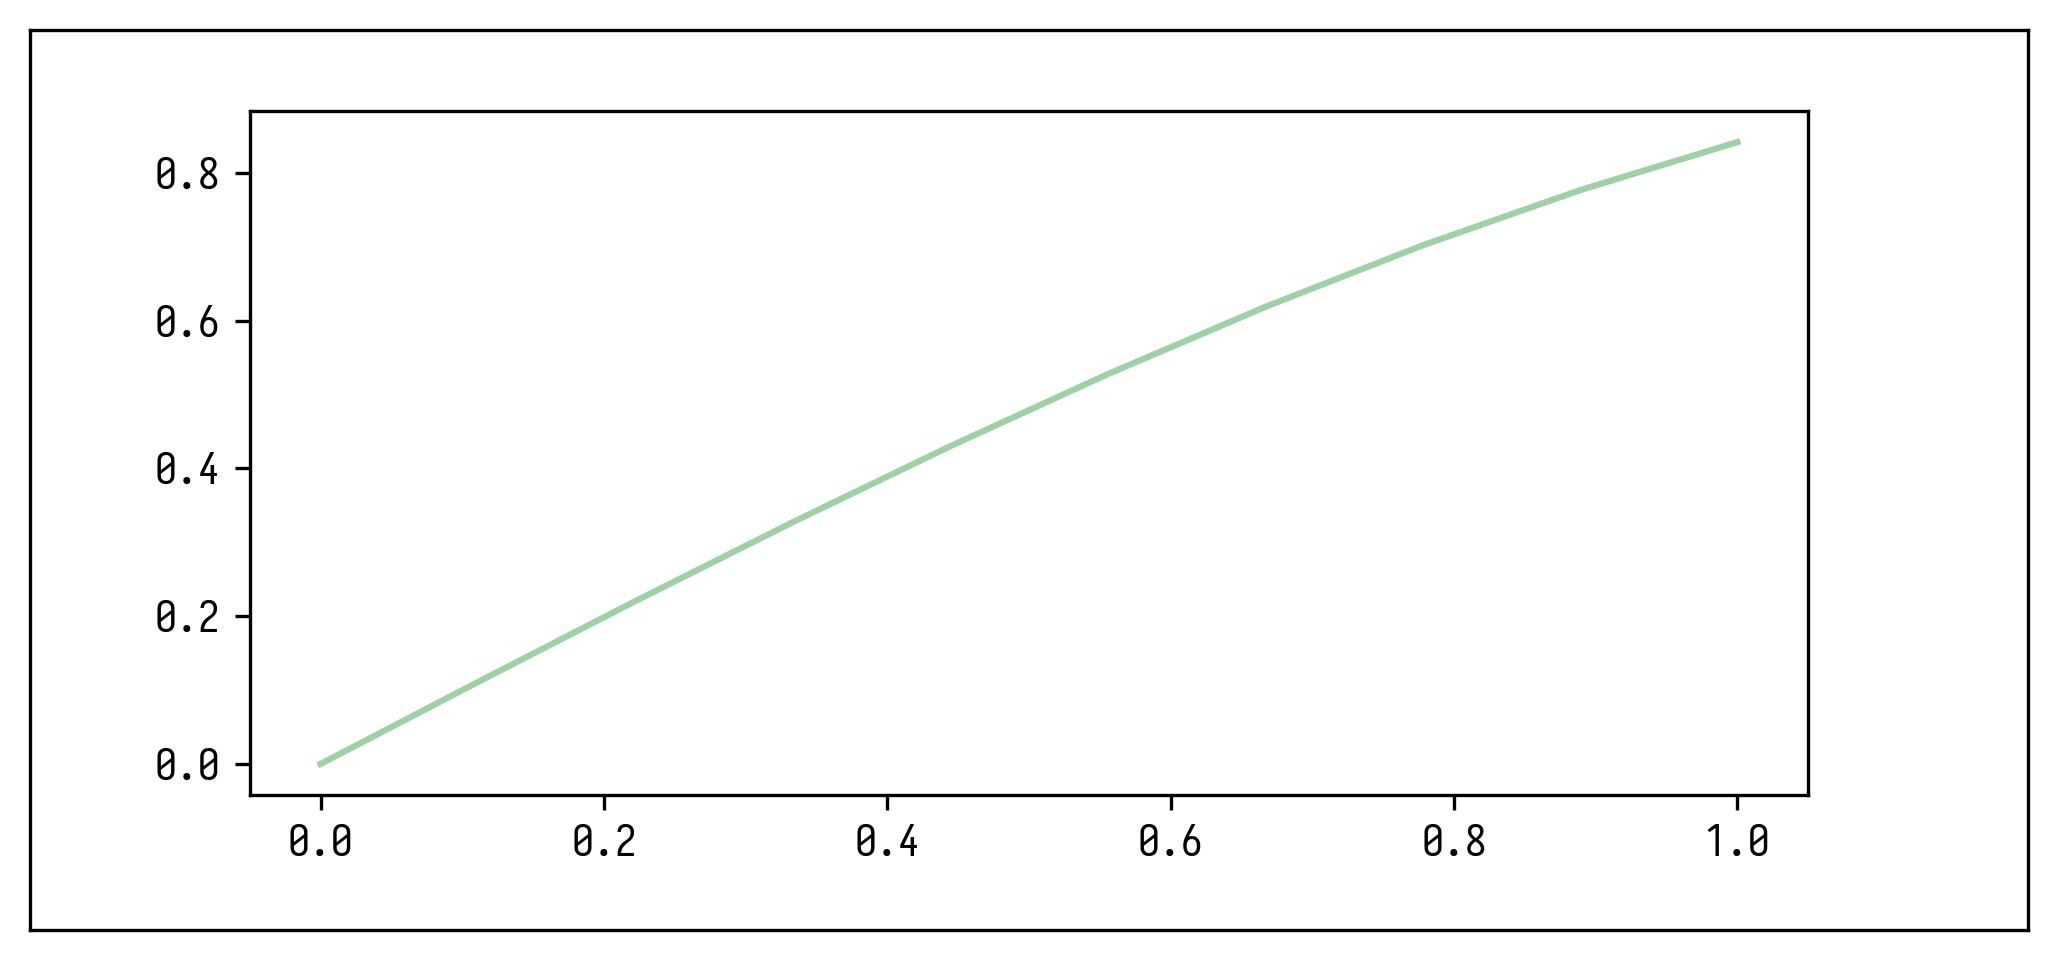

In [413]:
fig = mfigure(alpha=1)
ax = fig.add_subplot(1, 1, 1)
ax.name = 'ax'
lx = np.linspace(0, 1, 10)
art, *_ = ax.plot(lx, np.sin(lx), c='#9ed1a5')
# art = ax.barh(0,1)
# ax.containers = []
# ax._children = []
# ax.clear()
disp(fig)

In [415]:
def makeFrame(t:float):
    art.set_data(lx, np.sin((t+5)*lx))
    fig.canvas.draw()
    frame = np.array(fig.canvas.buffer_rgba())
    return frame[:,:,:3]


vc = me.VideoClip(makeFrame,duration=2)
vc = vc.set_duration(1).set_start(1)
vc_bg = me.ImageClip(
    np.ones(vc.get_frame(0).shape) * np.array([49, 56, 62]),duration=3
    )
print(vc.get_frame(0).shape)
me.ipython_display(me.CompositeVideoClip([vc_bg,vc]), fps=20)

(900, 1998, 3)
Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [27]:
mid = mido.MidiFile('test2.mid')
# mid = mido.MidiFile('test3_120PPQ.mid')

mid.__dict__

{'filename': 'test2.mid',
 'type': 1,
 'ticks_per_beat': 96,
 'charset': 'latin1',
 'debug': False,
 'clip': False,
 'tracks': [MidiTrack([
    MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0),
    MetaMessage('end_of_track', time=0)]),
  MidiTrack([
    MetaMessage('set_tempo', tempo=428571, time=0),
    MetaMessage('end_of_track', time=0)]),
  MidiTrack([
    MetaMessage('track_name', name='Trk 0', time=0),
    Message('control_change', channel=0, control=10, value=64, time=0),
    Message('control_change', channel=0, control=7, value=100, time=0),
    Message('pitchwheel', channel=0, pitch=0, time=0),
    Message('control_change', channel=0, control=101, value=0, time=0),
    Message('control_change', channel=0, control=100, value=0, time=0),
    Message('control_change', channel=0, control=6, value=12, time=0),
    Message('control_change', channel=0, control=10, value=64, time=0),
    Message('control_change', ch

In [146]:
import json

In [156]:
json.loads("""{"1":[1,2,3]}""")

{'1': [1, 2, 3]}

In [166]:
findall('!\s*([^=]+?)\s*=\s*([^!]+?)\s*(?=\s*!|$)','! pitch_range = [0, 100 ] ! v = 1,2, ')

[('pitch_range', '[0, 100 ]'), ('v', '1,2,')]